In [68]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
!unzip /content/AdventureWorks.zip

y
Archive:  /content/AdventureWorks.zip
replace AWCustomers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: AWCustomers.csv         
replace AWSales.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: AWSales.csv             
replace AWTest-Classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: AWTest-Classification.csv  
  inflating: AWTest-Regression.csv   


In [99]:
Customers_DS = pd.read_csv('/content/AWCustomers.csv')
Customers_DS.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [71]:
Customers_DS.shape

(18361, 24)

In [72]:
Sales_DS = pd.read_csv('/content/AWSales.csv')
Sales_DS.head(5)

,CustomerID,BikeBuyer,AvgMonthSpend
0,21173,1,50.97
1,13249,1,53.11
2,29350,1,54.08
3,13503,1,56.93
4,22803,1,55.41


In [73]:
print("No of customers : ", len(Customers_DS))

No of customers :  18361


Cleaning and Preprocessing

In [74]:
Customers_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            18361 non-null  int64 
 1   Title                 101 non-null    object
 2   FirstName             18361 non-null  object
 3   MiddleName            10572 non-null  object
 4   LastName              18361 non-null  object
 5   Suffix                3 non-null      object
 6   AddressLine1          18361 non-null  object
 7   AddressLine2          311 non-null    object
 8   City                  18361 non-null  object
 9   StateProvinceName     18361 non-null  object
 10  CountryRegionName     18361 non-null  object
 11  PostalCode            18361 non-null  object
 12  PhoneNumber           18361 non-null  object
 13  BirthDate             18361 non-null  object
 14  Education             18361 non-null  object
 15  Occupation            18361 non-null

In [75]:
Customers_DS.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000
mean,20241.987092,0.610588,1.270301,0.338162,0.850389,72754.779642
std,5336.332731,0.487630,0.913989,0.568957,0.927315,30686.014313
min,11000.000000,0.000000,0.000000,0.000000,0.000000,25435.000000
25%,15621.000000,0.000000,1.000000,0.000000,0.000000,53312.000000
50%,20248.000000,1.000000,1.000000,0.000000,0.000000,61851.000000
75%,24863.000000,1.000000,2.000000,1.000000,2.000000,87410.000000
max,29483.000000,1.000000,5.000000,3.000000,3.000000,139115.000000


In [76]:
Customers_DS.isnull().sum()

CustomerID                  0
Title                   18260
FirstName                   0
MiddleName               7789
LastName                    0
Suffix                  18358
AddressLine1                0
AddressLine2            18050
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
LastUpdated                 0
dtype: int64

In [77]:
Customers_DS.drop('Title', axis=1, inplace=True)

In [78]:
Customers_DS.drop('MiddleName', axis=1, inplace=True)

In [79]:
Customers_DS.drop('Suffix', axis=1, inplace=True)

In [80]:
Customers_DS.drop('AddressLine2', axis=1, inplace=True)

In [81]:
Customers_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            18361 non-null  int64 
 1   FirstName             18361 non-null  object
 2   LastName              18361 non-null  object
 3   AddressLine1          18361 non-null  object
 4   City                  18361 non-null  object
 5   StateProvinceName     18361 non-null  object
 6   CountryRegionName     18361 non-null  object
 7   PostalCode            18361 non-null  object
 8   PhoneNumber           18361 non-null  object
 9   BirthDate             18361 non-null  object
 10  Education             18361 non-null  object
 11  Occupation            18361 non-null  object
 12  Gender                18361 non-null  object
 13  MaritalStatus         18361 non-null  object
 14  HomeOwnerFlag         18361 non-null  int64 
 15  NumberCarsOwned       18361 non-null

In [82]:
Customers_DS.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0115,1987-11-13,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,British Columbia,Canada,V9B 2C3,787-555-0136,1972-07-21,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,California,United States,91791,120-555-0111,1985-11-09,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,England,United Kingdom,L4 4HB,1 (11) 500 555-0167,1977-10-18,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,22803,Marshall,Shan,Am Gallberg 234,Werne,Nordrhein-Westfalen,Germany,59368,1 (11) 500 555-0113,1975-02-05,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [83]:
Customers_DS['StateProvinceName'].value_counts()

California             4410
Washington             2254
England                1904
New South Wales        1549
British Columbia       1544
Oregon                 1068
Victoria                889
Queensland              787
Saarland                436
Nordrhein-Westfalen     404
Seine (Paris)           384
Hessen                  376
Hamburg                 296
Seine Saint Denis       283
Nord                    283
South Australia         238
Bayern                  227
Hauts de Seine          193
Yveline                 166
Essonne                 146
Tasmania                105
Seine et Marne           60
Loiret                   58
Moselle                  56
Garonne (Haute)          30
Val d'Oise               30
Val de Marne             30
Brandenburg              29
Somme                    22
Charente-Maritime        21
Loir et Cher             17
Pas de Calais            16
Alberta                  11
Illinois                  6
Ohio                      4
Texas               

In [84]:
Customers_DS['CountryRegionName'].value_counts()

United States     7770
Australia         3568
United Kingdom    1904
France            1795
Germany           1768
Canada            1556
Name: CountryRegionName, dtype: int64

In [85]:
ohe_countries=pd.get_dummies(Customers_DS['CountryRegionName'],drop_first=True)
Customers_DS.drop(columns=['CountryRegionName'],axis=1,inplace=True)
Customers_DS=pd.concat([ohe_countries,Customers_DS],axis=1)

In [86]:
Customers_DS.head()

,Canada,France,Germany,United Kingdom,United States,CustomerID,FirstName,LastName,AddressLine1,City,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,0,0,0,0,0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,1,0,0,0,0,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,0,0,0,0,1,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,0,0,0,1,0,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,0,0,1,0,0,22803,Marshall,Shan,Am Gallberg 234,Werne,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [87]:
df = Customers_DS

In [88]:
df['Education'].value_counts()

Bachelors              5325
Partial College        5024
High School            3274
Graduate Degree        3163
Partial High School    1575
Name: Education, dtype: int64

In [89]:
df['Education'] = df['Education'].map({'Partial High School': 1, 'High School' : 2, 'Partial College': 3, 'Bachelors': 4, 'Graduate Degree': 5})

In [90]:
df.head()

,Canada,France,Germany,United Kingdom,United States,CustomerID,FirstName,LastName,AddressLine1,City,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,0,0,0,0,0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,...,4,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,1,0,0,0,0,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,...,3,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,0,0,0,0,1,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,...,4,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,0,0,0,1,0,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,...,3,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,0,0,1,0,0,22803,Marshall,Shan,Am Gallberg 234,Werne,...,3,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [91]:
df['Occupation'].value_counts()

Skilled Manual    6059
Clerical          4464
Manual            3377
Management        2858
Professional      1603
Name: Occupation, dtype: int64

In [92]:
df['Occupation'] = df['Occupation'].map({'Manual' : 1, 'Skilled Manual': 2, 'Clerical': 3, 'Management': 4, 'Professional': 5})


In [93]:
df.head(20)

,Canada,France,Germany,United Kingdom,United States,CustomerID,FirstName,LastName,AddressLine1,City,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,0,0,0,0,0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,...,4,3,M,M,1,3,0,1,81916,2017-03-06
1,1,0,0,0,0,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,...,3,3,M,M,1,2,1,2,81076,2017-03-06
2,0,0,0,0,1,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,...,4,3,F,S,0,3,0,0,86387,2017-03-06
3,0,0,0,1,0,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,...,3,2,M,M,1,2,1,2,61481,2017-03-06
4,0,0,1,0,0,22803,Marshall,Shan,Am Gallberg 234,Werne,...,3,2,M,S,1,1,0,0,51804,2017-03-06
5,0,0,0,0,1,22092,Andrea,Young,9384 Ashmount Way,Tacoma,...,2,2,F,M,1,2,2,2,61944,2017-03-06
6,0,0,0,0,1,11229,Adrian,Stewart,6898 Shaw Rd.,Redwood City,...,3,1,M,S,1,1,0,0,34919,2017-03-06
7,0,0,0,0,0,24179,Robyn,Blanco,6270 Pinecreek Way,Lavender Bay,...,3,2,F,M,0,1,0,0,61832,2017-03-06
8,0,1,0,0,0,12127,Grace,Davis,"8188, rue Lamarck",Dunkerque,...,3,3,F,M,1,0,0,2,83834,2017-03-06
9,0,1,0,0,0,19903,Marcus,Nelson,"5, rue des Bouchers",Metz,...,2,1,M,S,0,1,0,0,26880,2017-03-06


In [94]:
sales.isnull().sum()

CustomerID       0
BikeBuyer        0
AvgMonthSpend    0
dtype: int64

In [96]:
sales.shape

(18355, 3)

In [101]:
df1 = df.drop_duplicates(subset=['CustomerID'])
df1

,Canada,France,Germany,United Kingdom,United States,CustomerID,FirstName,LastName,AddressLine1,City,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,0,0,0,0,0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,...,4,3,M,M,1,3,0,1,81916,2017-03-06
1,1,0,0,0,0,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,...,3,3,M,M,1,2,1,2,81076,2017-03-06
2,0,0,0,0,1,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,...,4,3,F,S,0,3,0,0,86387,2017-03-06
3,0,0,0,1,0,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,...,3,2,M,M,1,2,1,2,61481,2017-03-06
4,0,0,1,0,0,22803,Marshall,Shan,Am Gallberg 234,Werne,...,3,2,M,S,1,1,0,0,51804,2017-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,0,0,0,0,1,25414,Grace,Bailey,6627 Camelback Ct.,Coronado,...,5,2,F,M,0,1,0,2,52953,2017-03-06
18357,0,0,0,0,0,11459,Tasha,Deng,9627 Kendall Rd,Port Macquarie,...,4,2,F,S,0,2,0,0,60992,2017-03-06
18358,0,0,0,0,1,12160,Jaclyn,Zhang,4364 Viera Avenue,Beaverton,...,3,2,F,S,0,2,0,0,51859,2017-03-06
18359,1,0,0,0,0,14353,Erin,Reed,3866 Mt. Everest Court,Vancouver,...,2,3,F,S,0,0,0,0,87177,2017-03-06


In [102]:
df1.shape

(18355, 24)

In [106]:
newAW = pd.merge(df1, sales)

In [107]:
newAW.head()

,Canada,France,Germany,United Kingdom,United States,CustomerID,FirstName,LastName,AddressLine1,City,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,0,0,0,0,0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,...,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,1,0,0,0,0,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,...,M,M,1,2,1,2,81076,2017-03-06,1,53.11
2,0,0,0,0,1,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,...,F,S,0,3,0,0,86387,2017-03-06,1,54.08
3,0,0,0,1,0,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,...,M,M,1,2,1,2,61481,2017-03-06,1,56.93
4,0,0,1,0,0,22803,Marshall,Shan,Am Gallberg 234,Werne,...,M,S,1,1,0,0,51804,2017-03-06,1,55.41


In [109]:
newAW.shape

(18355, 26)

In [105]:
newAW.isnull().sum()

Canada                  0
France                  0
Germany                 0
United Kingdom          0
United States           0
CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
LastUpdated             0
BikeBuyer               0
AvgMonthSpend           0
dtype: int64

In [111]:
# newAW['BirthDate']= pd.to_datetime(newAW['BirthDate'])

# import datetime
# CURRENT_TIME = datetime.datetime.now()
# def get_age(birth_date,today=CURRENT_TIME):
#     y=today-birth_date
#     return y.days//365

# newAW['Age']=newAW['BirthDate'].apply(lambda x: get_age(x))

# newAW.drop(['BirthDate'],axis=1,inplace=True)

# newAW.head()

In [112]:
newAW.shape

(18355, 26)

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler = MinMaxScaler()
scaled=scaler.fit_transform(newAW[['YearlyIncome']])
newAW['YearlyIncome_scaled']=scaled[:,0]
newAW.drop(['YearlyIncome'],axis=1,inplace=True)

In [115]:
newAW.head()

,Canada,France,Germany,United Kingdom,United States,CustomerID,FirstName,LastName,AddressLine1,City,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,LastUpdated,BikeBuyer,AvgMonthSpend,Age,YearlyIncome_scaled
0,0,0,0,0,0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,...,M,1,3,0,1,2017-03-06,1,50.97,34,0.496842
1,1,0,0,0,0,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,...,M,1,2,1,2,2017-03-06,1,53.11,50,0.489453
2,0,0,0,0,1,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,...,S,0,3,0,0,2017-03-06,1,54.08,36,0.536172
3,0,0,0,1,0,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,...,M,1,2,1,2,2017-03-06,1,56.93,44,0.317083
4,0,0,1,0,0,22803,Marshall,Shan,Am Gallberg 234,Werne,...,S,1,1,0,0,2017-03-06,1,55.41,47,0.231958


In [116]:
newAW['M/F']=newAW['Gender'].map({'M':1,'F':0})
newAW.drop(['Gender'],axis=1,inplace=True)
newAW['MaritalStatus']=newAW['MaritalStatus'].map({'M':1,'S':0})

In [117]:
newAW.head()

,Canada,France,Germany,United Kingdom,United States,CustomerID,FirstName,LastName,AddressLine1,City,...,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,LastUpdated,BikeBuyer,AvgMonthSpend,Age,YearlyIncome_scaled,M/F
0,0,0,0,0,0,21173,Chad,Yuan,7090 C. Mount Hood,Wollongong,...,1,3,0,1,2017-03-06,1,50.97,34,0.496842,1
1,1,0,0,0,0,13249,Ryan,Perry,3651 Willow Lake Rd,Shawnee,...,1,2,1,2,2017-03-06,1,53.11,50,0.489453,1
2,0,0,0,0,1,29350,Julia,Thompson,1774 Tice Valley Blvd.,West Covina,...,0,3,0,0,2017-03-06,1,54.08,36,0.536172,0
3,0,0,0,1,0,13503,Theodore,Gomez,2103 Baldwin Dr,Liverpool,...,1,2,1,2,2017-03-06,1,56.93,44,0.317083,1
4,0,0,1,0,0,22803,Marshall,Shan,Am Gallberg 234,Werne,...,1,1,0,0,2017-03-06,1,55.41,47,0.231958,1


In [65]:
print(newAW.columns.tolist())

['Canada', 'France', 'Germany', 'United Kingdom', 'United States', 'CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City', 'StateProvinceName', 'PostalCode', 'PhoneNumber', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'LastUpdated', 'BikeBuyer', 'AvgMonthSpend', 'YearlyIncome_scaled', 'Age_scaled']


In [118]:
newAW.drop('FirstName', axis=1, inplace=True)
newAW.drop('LastName', axis=1, inplace=True)
newAW.drop('AddressLine1', axis=1, inplace=True)
newAW.drop('StateProvinceName', axis=1, inplace=True)
newAW.drop('PostalCode', axis=1, inplace=True)
newAW.drop('PhoneNumber', axis=1, inplace=True)

In [119]:
newAW.head()

,Canada,France,Germany,United Kingdom,United States,CustomerID,City,Education,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,LastUpdated,BikeBuyer,AvgMonthSpend,Age,YearlyIncome_scaled,M/F
0,0,0,0,0,0,21173,Wollongong,4,3,1,1,3,0,1,2017-03-06,1,50.97,34,0.496842,1
1,1,0,0,0,0,13249,Shawnee,3,3,1,1,2,1,2,2017-03-06,1,53.11,50,0.489453,1
2,0,0,0,0,1,29350,West Covina,4,3,0,0,3,0,0,2017-03-06,1,54.08,36,0.536172,0
3,0,0,0,1,0,13503,Liverpool,3,2,1,1,2,1,2,2017-03-06,1,56.93,44,0.317083,1
4,0,0,1,0,0,22803,Werne,3,2,0,1,1,0,0,2017-03-06,1,55.41,47,0.231958,1


In [120]:
newAW.drop('LastUpdated', axis=1, inplace=True)

In [121]:
newAW['Age'].value_counts()

36    664
38    652
35    647
34    643
32    636
     ... 
82      2
92      1
87      1
86      1
91      1
Name: Age, Length: 71, dtype: int64

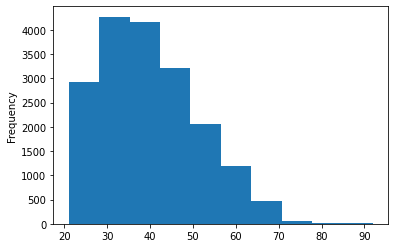

In [122]:
newAW['Age'].plot(kind='hist')

In [139]:
newAW['4 bins'] = pd.qcut(newAW['Age'], q=4)
newAW.head()

,Canada,France,Germany,United Kingdom,United States,CustomerID,City,Education,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,BikeBuyer,AvgMonthSpend,Age,YearlyIncome_scaled,M/F,4 bins
0,0,0,0,0,0,21173,Wollongong,4,3,1,1,3,0,1,1,50.97,34,0.496842,1,"(31.0, 39.0]"
1,1,0,0,0,0,13249,Shawnee,3,3,1,1,2,1,2,1,53.11,50,0.489453,1,"(47.0, 92.0]"
2,0,0,0,0,1,29350,West Covina,4,3,0,0,3,0,0,1,54.08,36,0.536172,0,"(31.0, 39.0]"
3,0,0,0,1,0,13503,Liverpool,3,2,1,1,2,1,2,1,56.93,44,0.317083,1,"(39.0, 47.0]"
4,0,0,1,0,0,22803,Werne,3,2,0,1,1,0,0,1,55.41,47,0.231958,1,"(39.0, 47.0]"


In [140]:
print(newAW['4 bins'])

0          (31.0, 39.0]
1          (47.0, 92.0]
2          (31.0, 39.0]
3          (39.0, 47.0]
4          (39.0, 47.0]
              ...      
18350    (20.999, 31.0]
18351    (20.999, 31.0]
18352      (31.0, 39.0]
18353    (20.999, 31.0]
18354      (31.0, 39.0]
Name: 4 bins, Length: 18355, dtype: category
Categories (4, interval[float64, right]): [(20.999, 31.0] < (31.0, 39.0] < (39.0, 47.0] <
                                           (47.0, 92.0]]


In [141]:
newAW.head()

,Canada,France,Germany,United Kingdom,United States,CustomerID,City,Education,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,BikeBuyer,AvgMonthSpend,Age,YearlyIncome_scaled,M/F,4 bins
0,0,0,0,0,0,21173,Wollongong,4,3,1,1,3,0,1,1,50.97,34,0.496842,1,"(31.0, 39.0]"
1,1,0,0,0,0,13249,Shawnee,3,3,1,1,2,1,2,1,53.11,50,0.489453,1,"(47.0, 92.0]"
2,0,0,0,0,1,29350,West Covina,4,3,0,0,3,0,0,1,54.08,36,0.536172,0,"(31.0, 39.0]"
3,0,0,0,1,0,13503,Liverpool,3,2,1,1,2,1,2,1,56.93,44,0.317083,1,"(39.0, 47.0]"
4,0,0,1,0,0,22803,Werne,3,2,0,1,1,0,0,1,55.41,47,0.231958,1,"(39.0, 47.0]"


In [124]:
from scipy.spatial import distance

In [125]:
from numpy.linalg import norm

In [126]:
A = newAW['YearlyIncome_scaled']
B = newAW['Education']

cosine = np.dot(A,B)/(norm(A)*norm(B))



In [127]:
print("Cosine Similarity between YearlyIncome_Scaled and Education", cosine)


Cosine Similarity between YearlyIncome_Scaled and Education 0.87552000634723


In [128]:
A1 = newAW['YearlyIncome_scaled']
B2 = newAW['BikeBuyer']

c = np.dot(A1,B2)/(norm(A1)*norm(B2))

In [129]:
print("Cosine Similarity between YearlyIncome_Scaled and BikeBuyer", cosine)

Cosine Similarity between YearlyIncome_Scaled and BikeBuyer 0.87552000634723


In [130]:
distance.cosine(newAW['BikeBuyer'].values,newAW['YearlyIncome_scaled'].values)

0.2858810208094148

In [131]:
distance.cosine(newAW['Education'].values,newAW['YearlyIncome_scaled'].values)

0.12447999365277018

In [132]:
distance.cosine(newAW['AvgMonthSpend'].values,newAW['YearlyIncome_scaled'].values)

0.14369130784260475

In [133]:
distance.jaccard(newAW['BikeBuyer'].values,newAW['YearlyIncome_scaled'].values)

1.0

In [134]:
distance.jaccard(newAW['AvgMonthSpend'].values,newAW['YearlyIncome_scaled'].values)

1.0

In [142]:
newAW['BikeBuyer'].corr(newAW['YearlyIncome_scaled'])

0.24951835588873428

In [143]:
newAW['AvgMonthSpend'].corr(newAW['YearlyIncome_scaled'])

0.5301195469528243

In [145]:
cor =  np.corrcoef(newAW['Education'], newAW['YearlyIncome_scaled'])
cor

array([[1.        , 0.46768437],
       [0.46768437, 1.        ]])